In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
columns = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
'smoothness1', 'compactness1', 'concavity1', 'concave_points1']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
df = pd.read_csv(url, header=None, names=columns)

# Map diagnosis labels to binary values (M = 1, B = 0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Step 2: Preprocess the Data
X = df.iloc[:, 2:].values  # Features (columns 3 to 32)
y = df['Diagnosis'].values  # Target (Diagnosis column)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),  # 30 input features
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),  # Output layer for binary classification
            nn.Sigmoid()       # Sigmoid activation for binary output
        )

    def forward(self, x):
        return self.model(x)

model = NeuralNetwork()


In [12]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Train the Model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()  # Adjust shape for BCELoss
        loss = criterion(outputs, y_batch.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.5514
Epoch 2/20, Loss: 0.2759
Epoch 3/20, Loss: 0.1266
Epoch 4/20, Loss: 0.0881
Epoch 5/20, Loss: 0.0737
Epoch 6/20, Loss: 0.0641
Epoch 7/20, Loss: 0.0575
Epoch 8/20, Loss: 0.0538
Epoch 9/20, Loss: 0.0483
Epoch 10/20, Loss: 0.0440
Epoch 11/20, Loss: 0.0394
Epoch 12/20, Loss: 0.0360
Epoch 13/20, Loss: 0.0333
Epoch 14/20, Loss: 0.0304
Epoch 15/20, Loss: 0.0284
Epoch 16/20, Loss: 0.0260
Epoch 17/20, Loss: 0.0238
Epoch 18/20, Loss: 0.0215
Epoch 19/20, Loss: 0.0201
Epoch 20/20, Loss: 0.0185


In [13]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch).squeeze()
        predicted = (outputs > 0.5).long()  # Apply threshold for binary classification
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9825


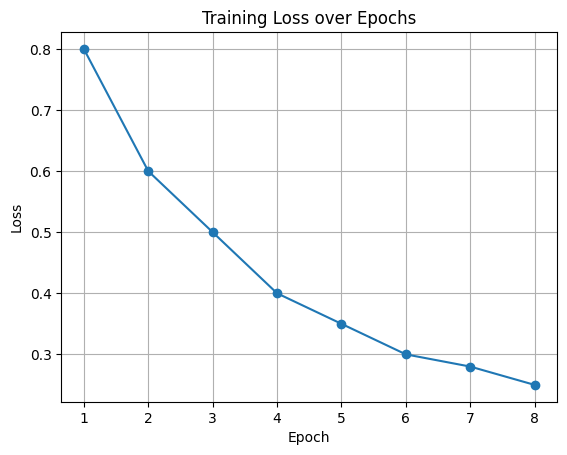

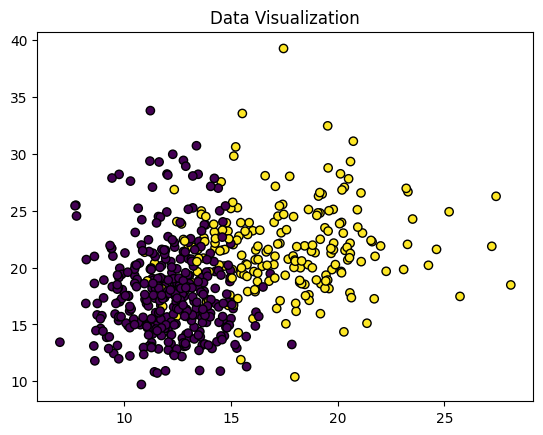

In [15]:
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]  # Example values for visualization
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Data Visualization')
plt.show()